# Predicting Placement Packages with Linear Regression
This notebook builds a Simple Linear Regression model to predict placement packages (LPA) based on CGPA using the `placement.csv` dataset.


In [1]:
# Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Retrival

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


## Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

We can see that our data have 2 non_null numeric features,cgpa and 	package  with 200 entries 

In [6]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [7]:
df.skew()

cgpa       0.029655
package   -0.004815
dtype: float64

So there is no outliers and both distributions are extremely symmetric

## Data Visulization

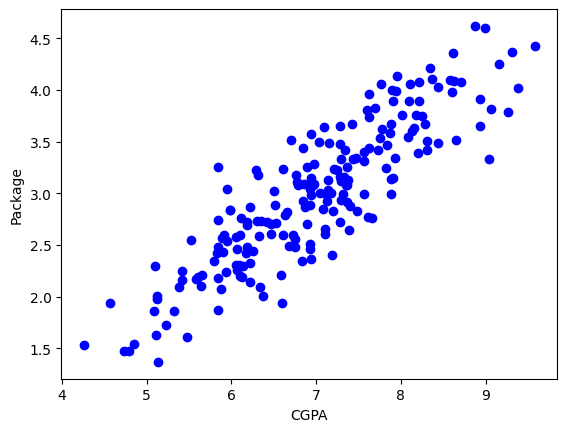

In [8]:
# Plotting distribution of CGPA
plt.scatter(df.cgpa,df.package,color='blue')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

Text(0.5, 1.0, 'Distribution of CGPA with KDE')

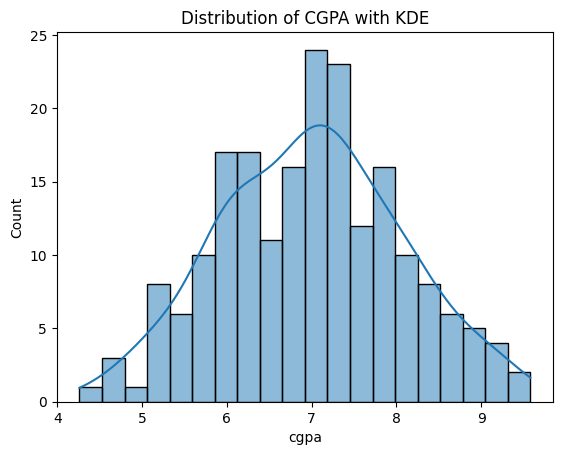

In [9]:
# Checking distribution of our single feature
sns.histplot(df['cgpa'], kde=True, bins=20)
plt.title("Distribution of CGPA with KDE")


Text(0.5, 1.0, 'Distribution of Package with KDE')

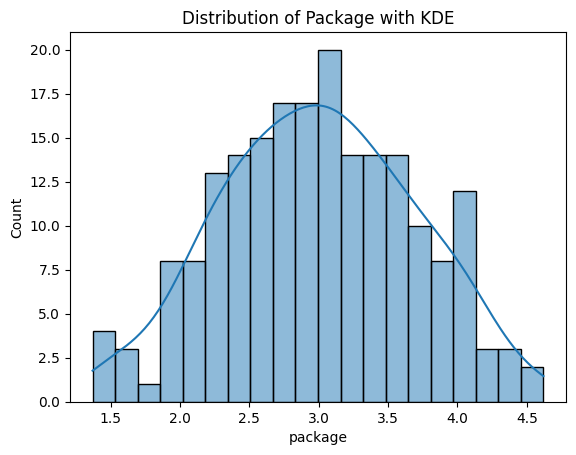

In [10]:
# Checking  distribution of Target
sns.histplot(df['package'], kde=True, bins=20)
plt.title("Distribution of Package with KDE")

### Distribution Analysis

The histograms and KDE plots show that both **CGPA** and **Package** follow a nearly bell-shaped distribution.  
- The distributions are approximately **normal (symmetric)** with mean ≈ median.  
- No significant **skewness** is present (confirmed by skewness values close to 0).  
- KDE curves reinforce the histogram patterns, showing smooth, unimodal shapes.  
- No strong **outliers** are observed.
This suggests that the dataset is well-behaved and suitable for modeling without heavy preprocessing.

## Model Training

In this step, we train a **Simple Linear Regression** model using CGPA as the independent variable (feature) and Placement Package as the dependent variable (target).



In [11]:
X=df.cgpa.to_numpy()
y=df.package.to_numpy()

In [12]:
# Create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [13]:
# Build a simple linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# Print the coefficients
print ('Coefficients: ', lr.coef_[0]) 
print ('Intercept: ',lr.intercept_)

Coefficients:  0.5742564727019197
Intercept:  -1.0270069374542108


## Model Evaluation

### Visualizing model outputs
Im  visualizing the goodness-of-fit of the model to the training data by plotting the fitted line over the data.


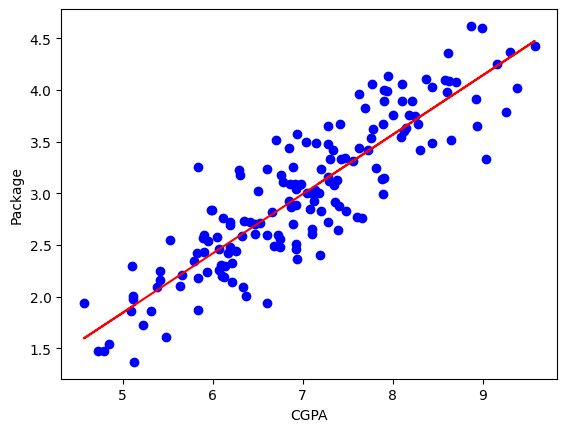

In [15]:
plt.scatter(X_train,y_train,color='blue')
plt.plot( X_train, lr.coef_ * X_train + lr.intercept_,'-r')     # lr.predict(X_train)
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.savefig("my_plot.png")
plt.show()

### Performance Metrics
Evaluating performance with MAE, MSE, RMSE, and R² metrics.

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Use the predict method to make test predictions
y_pred = lr.predict( X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test, y_pred))
print("R2-score: %.2f" % r2_score( y_test, y_pred))

Mean absolute error: 0.23
Mean squared error: 0.08
Root mean squared error: 0.29
R2-score: 0.77


## Conclusion
This Simple Linear Regression model predicts placement packages (LPA) based on CGPA with strong performance, achieving an R² score of 0.77 (explaining 77% of variance), MAE of 0.23 (average error of 0.23 LPA), and RMSE of 0.29. While CGPA is a robust predictor, including factors like internships could enhance accuracy. This project demonstrates machine learning’s power for practical insights.